The problem is to analyze commodity prices for various commodities using the commodity
prices dataset. The goal is to leverage Python, data science techniques, statistical analysis
and data modeling. Perform all necessary steps to get the key insights from the data.

This dataset contains monthly commodity prices from 1960 to 2022. The commodity prices


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('commodity_prices (1) (1).csv')
df.head()

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,2,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,3,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,4,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,5,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


## EDA 

In [6]:
df.shape

(756, 12)

In [9]:
# Dropping Unnamed column 
df = df.drop(columns = ['Unnamed: 0'])

In [11]:
df.head(2)

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679


In [12]:
df.isnull().sum  # No Null Values / No action required 

date               0
oil_brent          0
oil_dubai          0
coffee_arabica     0
coffee_robustas    0
tea_columbo        0
tea_kolkata        0
tea_mombasa        0
sugar_eu           0
sugar_us           0
sugar_world        0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oil_brent,756.0,32.724944,31.885368,1.210000,10.564999,20.489130,47.157500,133.873043
oil_dubai,756.0,31.238130,30.936611,1.210000,10.452500,18.550000,45.576023,131.224783
coffee_arabica,756.0,2.576555,1.342454,0.777600,1.351625,2.697794,3.312950,7.003600
coffee_robustas,756.0,1.727478,0.940748,0.487210,0.923053,1.632172,2.282200,6.883547
tea_columbo,756.0,1.777962,1.008679,0.434198,0.892501,1.504001,2.515204,4.490000
tea_kolkata,756.0,1.870308,0.697867,0.664799,1.297369,1.850612,2.376899,4.073011
tea_mombasa,756.0,1.671222,0.615357,0.719600,1.136800,1.598257,2.083830,3.392500
sugar_eu,756.0,0.405158,0.187741,0.112215,0.298120,0.402343,0.569519,0.783171
sugar_us,756.0,0.432462,0.188589,0.116845,0.297624,0.471119,0.512188,1.263247
sugar_world,756.0,0.240263,0.151947,0.028700,0.139705,0.215285,0.309325,1.237700


####  if any null value
  #1 -- droping the null value   
  df=df.dropna()
    
  #2 -- filling the null values



#df=df["oil_dubai"].fillna(23.67)  # manualy

#df=df["oil_dubai"].fillna(x) where x is mean of the column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             756 non-null    object 
 1   oil_brent        756 non-null    float64
 2   oil_dubai        756 non-null    float64
 3   coffee_arabica   756 non-null    float64
 4   coffee_robustas  756 non-null    float64
 5   tea_columbo      756 non-null    float64
 6   tea_kolkata      756 non-null    float64
 7   tea_mombasa      756 non-null    float64
 8   sugar_eu         756 non-null    float64
 9   sugar_us         756 non-null    float64
 10  sugar_world      756 non-null    float64
dtypes: float64(10), object(1)
memory usage: 65.1+ KB


In [16]:
# we have date in Object datattype so we have to chage it into datetime 

df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             756 non-null    datetime64[ns]
 1   oil_brent        756 non-null    float64       
 2   oil_dubai        756 non-null    float64       
 3   coffee_arabica   756 non-null    float64       
 4   coffee_robustas  756 non-null    float64       
 5   tea_columbo      756 non-null    float64       
 6   tea_kolkata      756 non-null    float64       
 7   tea_mombasa      756 non-null    float64       
 8   sugar_eu         756 non-null    float64       
 9   sugar_us         756 non-null    float64       
 10  sugar_world      756 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 65.1 KB


#### 1. What is the maximum price of Robusta coffee ?

In [19]:
df['coffee_robustas'].max()

6.883547

#### 2. What is the 75th percentile of sugar prices in the European Union (EU)?
 

In [24]:
sugar_eu_75 =  df["sugar_eu"].quantile(0.75)

sugar_eu_75                                      

0.56951937998

#### 3. What is the skewness of the price distribution for Arabica coffee?

In [26]:
df['coffee_arabica'].skew() # therefore this data is right skew data 

0.5903976942861767

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='coffee_arabica'>

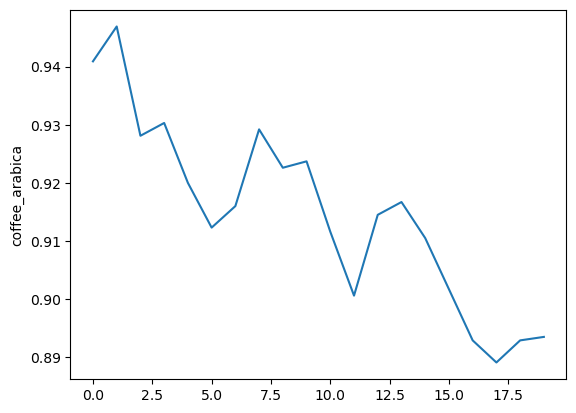

In [44]:
sns.lineplot(df['coffee_arabica'].head(20))

#### Q4) Is the distribution of sugar prices in the US significantly different from a normal distribution?

In [48]:
# null Hypothesis : normal distribution
# alternateHypothesis : not  normal distribution

 
from scipy import stats

us_sugar = df['sugar_us']
test,p = stats.normaltest(us_sugar)
print('p_value: ', p)

if p < 0.05:
    print('Reject Null hypothesis / not normally distributed ')
else:
    print('Failed to reject null/Accept null// normally distributed')




p_value:  0.39009821516930415
Failed to reject null/Accept null// normally distributed


#### 5. Which commodity experienced the highest price fluctuations during the observed period?

In [49]:
# create a vairable with all the coulumns
# run a for loop and find Max()-Min() for each coulmn
# find the highest fluctuation value

df.columns

Index(['date', 'oil_brent', 'oil_dubai', 'coffee_arabica', 'coffee_robustas',
       'tea_columbo', 'tea_kolkata', 'tea_mombasa', 'sugar_eu', 'sugar_us',
       'sugar_world'],
      dtype='object')

In [65]:
a =[ 'oil_brent', 'oil_dubai', 'coffee_arabica', 'coffee_robustas',
       'tea_columbo', 'tea_kolkata', 'tea_mombasa', 'sugar_eu', 'sugar_us',
       'sugar_world']

l = []
for i in a:
    x = df[i].max() - df[i].min()
    l.append(x)

# Convert the two lists into a dictionary
result_dict = dict(zip(a, l))

print(result_dict)


{'oil_brent': 132.66304347826, 'oil_dubai': 130.0147826087, 'coffee_arabica': 6.226, 'coffee_robustas': 6.3963372, 'tea_columbo': 4.0558021, 'tea_kolkata': 3.4082116538099996, 'tea_mombasa': 2.6729003000000002, 'sugar_eu': 0.670955482, 'sugar_us': 1.1464024, 'sugar_world': 1.209}


In [ ]:
# Therefore aximum fluctustion is in  oil_brent 

#### 6 What is the overall price trend for each commodity ?

<function matplotlib.pyplot.show(close=None, block=None)>

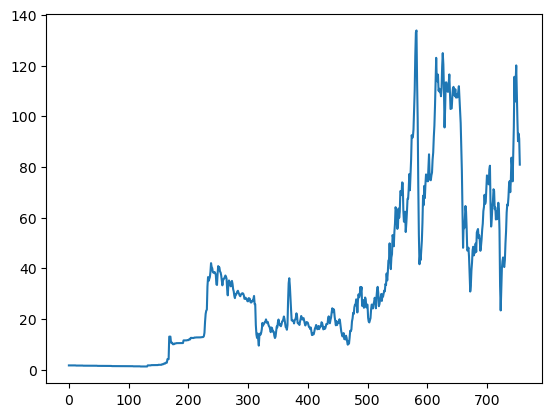

In [67]:
plt.plot(df['oil_brent'])
plt.show